### Data import

In [15]:
import pandas as pd

train_data = pd.read_csv('car_evaluation.csv',delimiter=',',names=['buying', 'maint','doors','persons','lug_boot','safety','target'])
train_data.head()

,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   target    1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### Data Plots

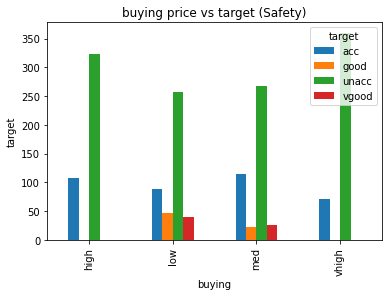

In [17]:
import matplotlib.pyplot as plt 

%matplotlib inline
pd.crosstab(train_data.buying,train_data.target).plot(kind='bar')
plt.title('buying price vs target (Safety)')
plt.xlabel('buying')
plt.ylabel('target')
plt.savefig('imgs/buying.png')

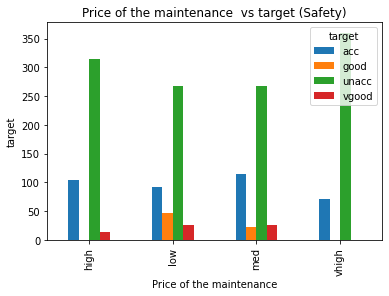

In [18]:
%matplotlib inline
pd.crosstab(train_data.maint,train_data.target).plot(kind='bar')
plt.title('Price of the maintenance  vs target (Safety)')
plt.xlabel('Price of the maintenance')
plt.ylabel('target')
plt.savefig('imgs/maint.png')

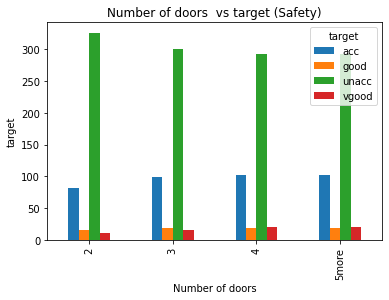

In [19]:
%matplotlib inline
pd.crosstab(train_data.doors,train_data.target).plot(kind='bar')
plt.title('Number of doors  vs target (Safety)')
plt.xlabel('Number of doors')
plt.ylabel('target')
plt.savefig('imgs/doors.png')

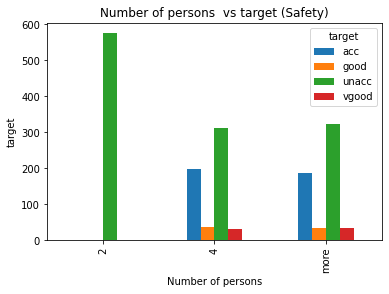

In [20]:
%matplotlib inline
pd.crosstab(train_data.persons,train_data.target).plot(kind='bar')
plt.title('Number of persons  vs target (Safety)')
plt.xlabel('Number of persons')
plt.ylabel('target')
plt.savefig('imgs/persons.png')

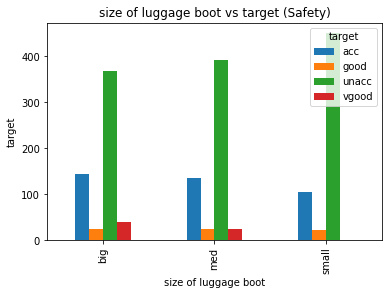

In [21]:
%matplotlib inline
pd.crosstab(train_data.lug_boot,train_data.target).plot(kind='bar')
plt.title('size of luggage boot vs target (Safety)')
plt.xlabel('size of luggage boot')
plt.ylabel('target')
plt.savefig('imgs/luggage.png')

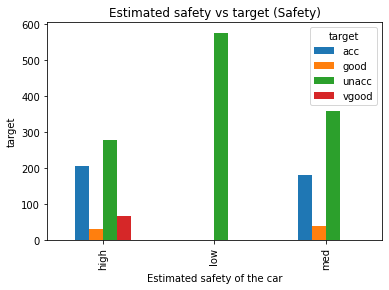

In [22]:
%matplotlib inline
pd.crosstab(train_data.safety,train_data.target).plot(kind='bar')
plt.title('Estimated safety vs target (Safety)')
plt.xlabel('Estimated safety of the car')
plt.ylabel('target')
plt.savefig('imgs/safety.png')

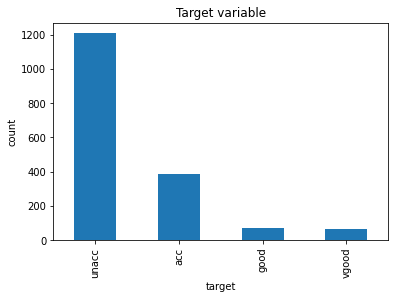

In [23]:
train_data['target'].value_counts().plot(kind='bar')
plt.title('Target variable')
plt.xlabel('target')
plt.ylabel('count')
plt.savefig('imgs/target.png')

In [24]:
from scipy.stats import chi2_contingency#Testing the relationship

#chi_res = chi2_contingency(pd.crosstab(loan['Loan_Status'], loan['Gender']))
#print('Chi2 Statistic: {}, p-value: {}'.format(chi_res[0], chi_res[1]))

import itertools
comb = itertools.combinations(train_data.columns, 2)
comb = list(comb)
for i in comb:
    chi_res = chi2_contingency(pd.crosstab(train_data[i[0]].astype('object',copy=True,errors='ignore'),train_data[i[1]].astype('object',copy=True,errors='ignore')))
    print(i[0]+' - '+i[1]+' p-value = '+str(chi_res[1]))

buying - maint p-value = 1.0
buying - doors p-value = 1.0
buying - persons p-value = 1.0
buying - lug_boot p-value = 1.0
buying - safety p-value = 1.0
buying - target p-value = 5.9280625992133936e-36
maint - doors p-value = 1.0
maint - persons p-value = 1.0
maint - lug_boot p-value = 1.0
maint - safety p-value = 1.0
maint - target p-value = 2.5476519845077733e-26
doors - persons p-value = 1.0
doors - lug_boot p-value = 1.0
doors - safety p-value = 1.0
doors - target p-value = 0.32024215990030563
persons - lug_boot p-value = 1.0
persons - safety p-value = 1.0
persons - target p-value = 4.039968047270742e-77
lug_boot - safety p-value = 1.0
lug_boot - target p-value = 1.0294402753134833e-09
safety - target p-value = 2.389155399044034e-100


### Pre-processing pipeline

In [25]:
# own type of encoding
data = train_data.copy()

# order buying ,maint ,doors ,persons ,lug_boot ,safety ,target
categories_order = {'buying':['low','med','high','vhigh'],'maint':['low','med','high','vhigh'],'doors':['2','3','4','5more'],'persons':['2','4','more'] 
                    ,'lug_boot':['small','med','big'],'safety':['low','med','high'],'target':['unacc','acc','good','vgood']}

In [26]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [27]:
for col in data.columns:
    dic = {}
    o = 1
    for i in categories_order[col]:
        dic[i] = o
        o = o+1
    print(dic)
    data[col].replace(dic, inplace=True)

{'low': 1, 'med': 2, 'high': 3, 'vhigh': 4}
{'low': 1, 'med': 2, 'high': 3, 'vhigh': 4}
{'2': 1, '3': 2, '4': 3, '5more': 4}
{'2': 1, '4': 2, 'more': 3}
{'small': 1, 'med': 2, 'big': 3}
{'low': 1, 'med': 2, 'high': 3}
{'unacc': 1, 'acc': 2, 'good': 3, 'vgood': 4}


In [28]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,target
0,4,4,1,1,1,1,1
1,4,4,1,1,1,2,1
2,4,4,1,1,1,3,1
3,4,4,1,1,2,1,1
4,4,4,1,1,2,2,1


### Decision tree classifier Model

In [67]:
# train test split
from sklearn.model_selection import train_test_split

X = data.drop('target',axis=1)
y = data['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.7,random_state=143,stratify = y)

In [68]:
from sklearn.ensemble import RandomForestClassifier

clf_model = RandomForestClassifier(n_estimators=100,criterion='entropy')  
clf_model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [69]:
y_pred = clf_model.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_pred)

0.952892561983471

In [71]:
feature_imp = pd.Series(clf_model.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

safety      0.288672
persons     0.223599
buying      0.162702
maint       0.160601
lug_boot    0.091863
doors       0.072563
dtype: float64

No handles with labels found to put in legend.


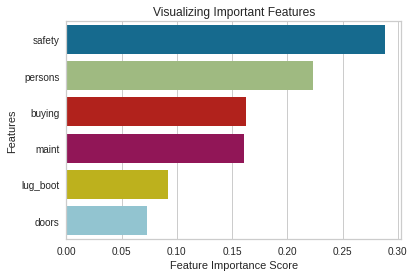

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [73]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      0.98      0.98       847
           2       0.91      0.92      0.92       269
           3       0.76      1.00      0.86        48
           4       1.00      0.65      0.79        46

    accuracy                           0.95      1210
   macro avg       0.91      0.89      0.89      1210
weighted avg       0.96      0.95      0.95      1210



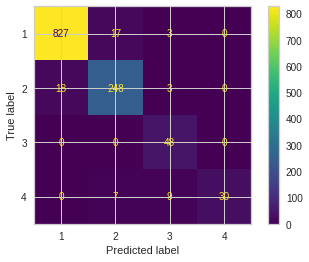

In [78]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf_model, X_test, y_test)  

In [75]:
y_prob_pred = clf_model.predict_proba(X_test)

In [76]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_prob_pred, multi_class='ovo', average='weighted')

0.9947401221114544

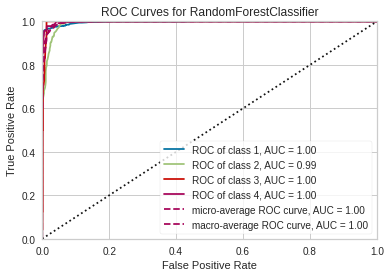

In [77]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(clf_model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

In [50]:
list(data['target'].unique())

[1, 2, 4, 3]

In [51]:
target = list(train_data['target'].unique())
feature_names = list(X.columns)

In [64]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf_model.estimators_[9],
                                out_file=None, 
                      feature_names=feature_names,  
                      class_names=target,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  

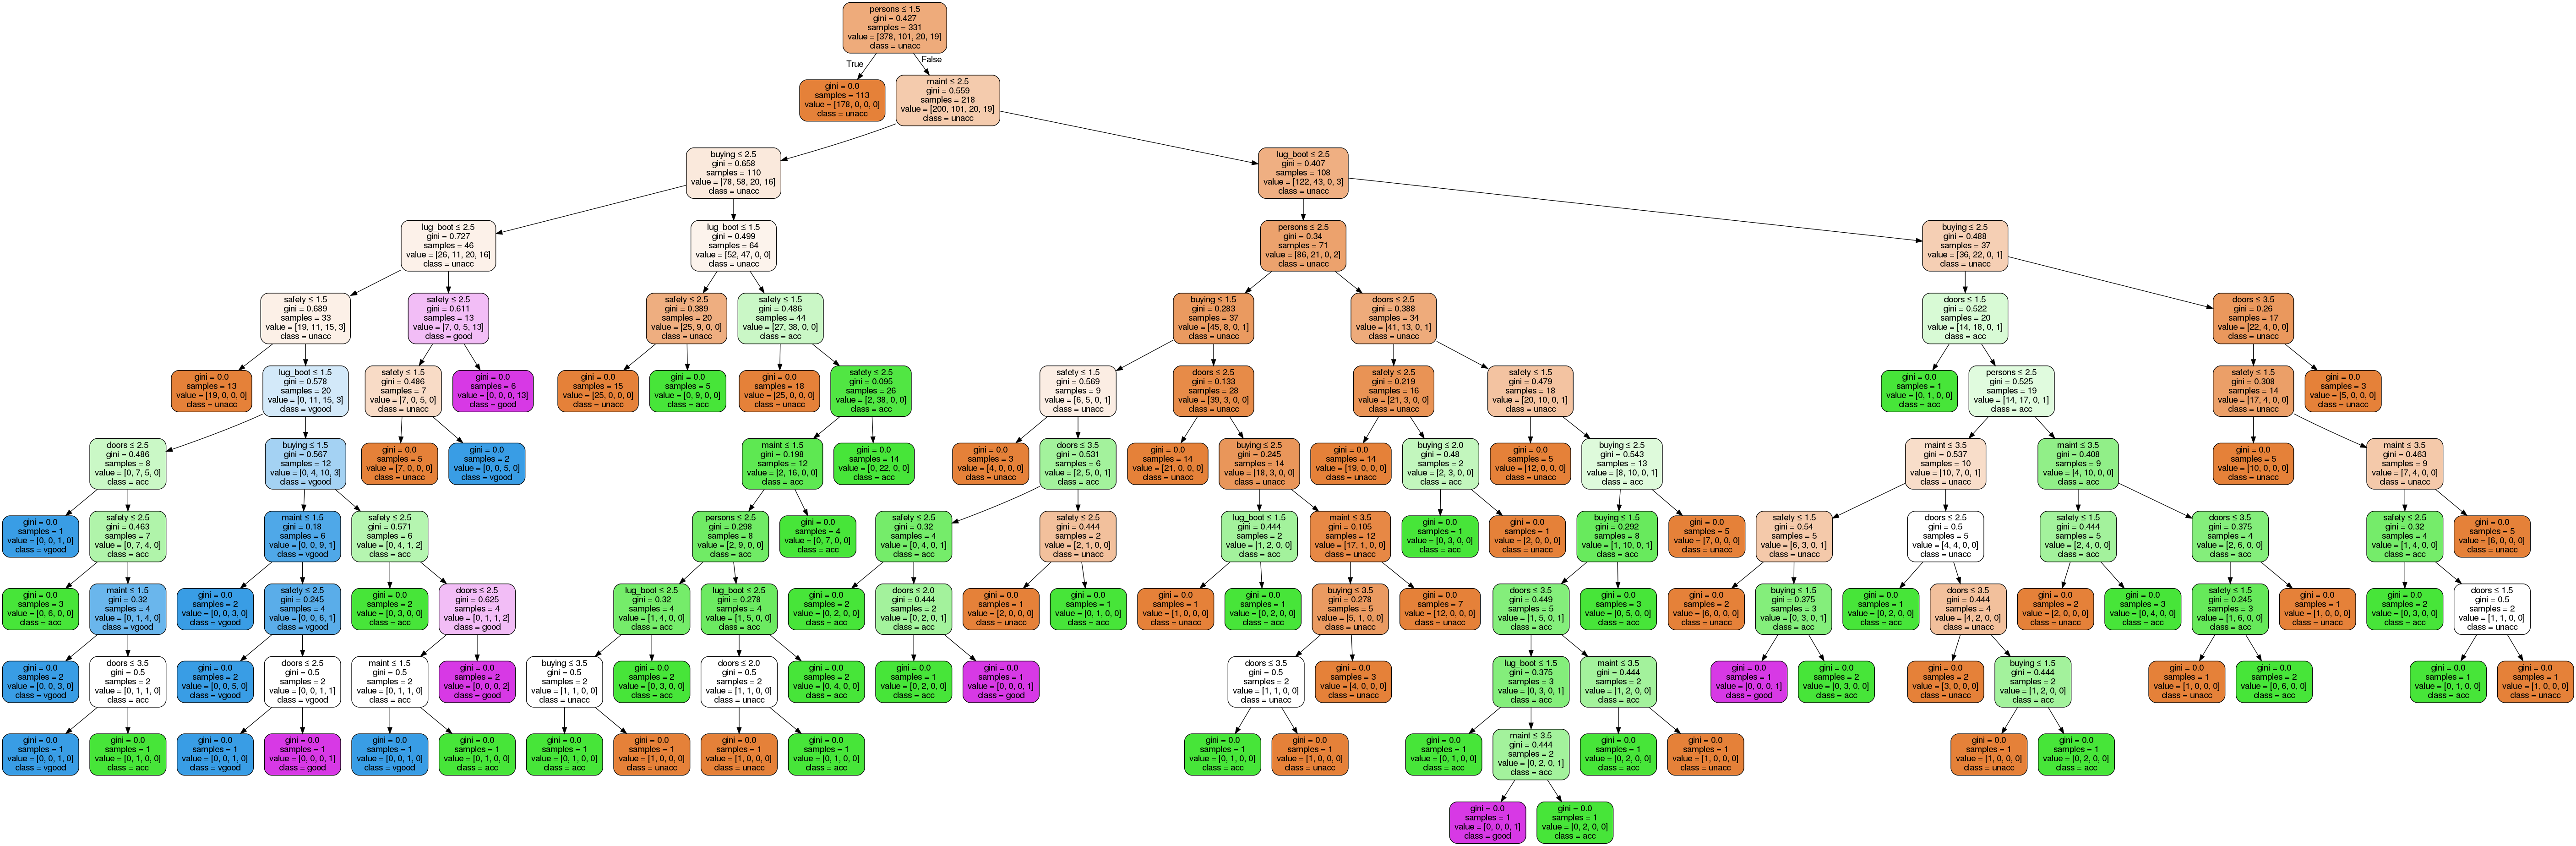

In [65]:
from IPython.display import Image 
from pydot import graph_from_dot_data

(graph, ) = graph_from_dot_data(dot_data)
Image(graph.create_png())

### Attempt 2

In [56]:
from chefboost import Chefboost as chef
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

X = pd.read_csv('car_evaluation.csv',delimiter=',',names=['buying', 'maint','doors','persons','lug_boot','safety','Decision'])
X.head()

,buying,maint,doors,persons,lug_boot,safety,Decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [57]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=143, stratify=X["Decision"])

In [61]:
config = {'enableRandomForest': True, 'num_of_trees': 3,'algorithm': 'ID3'}
model = chef.fit(X_train, config = config)

[INFO]:  4 CPU cores will be allocated in parallel running
ID3  tree is going to be built...


100%|██████████| 3/3 [00:06<00:00,  2.07s/it]


-------------------------
finished in  6.3689048290252686  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  93.12590448625181 % on  1382  instances
Labels:  ['unacc' 'acc' 'good' 'vgood']
Confusion matrix:  [[934, 31, 0, 0], [32, 270, 9, 6], [1, 5, 41, 4], [1, 1, 5, 42]]
Decision  unacc  => Accuray:  95.2967 %, Precision:  96.7876 %, Recall:  96.4876 %, F1:  96.6374 %
Decision  acc  => Accuray:  93.9219 %, Precision:  85.1735 %, Recall:  87.9479 %, F1:  86.5385 %
Decision  good  => Accuray:  98.2634 %, Precision:  80.3922 %, Recall:  74.5455 %, F1:  77.3585 %
Decision  vgood  => Accuray:  98.7699 %, Precision:  85.7143 %, Recall:  80.7692 %, F1:  83.1683 %


In [62]:
prediction = chef.predict(model, X_test.iloc[0])

In [63]:
evaluation = chef.evaluate(model, X_test, task="test")

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'Prediction', 'Decision']
-------------------------
Evaluate  test set
-------------------------
Accuracy:  88.15028901734104 % on  346  instances
Labels:  ['unacc' 'good' 'acc' 'vgood']
Confusion matrix:  [[230, 0, 14, 0], [0, 7, 3, 2], [12, 2, 60, 3], [0, 5, 0, 8]]
Decision  unacc  => Accuray:  92.4855 %, Precision:  94.2623 %, Recall:  95.0413 %, F1:  94.6502 %
Decision  good  => Accuray:  96.5318 %, Precision:  58.3333 %, Recall:  50.0 %, F1:  53.8461 %
Decision  acc  => Accuray:  90.1734 %, Precision:  77.9221 %, Recall:  77.9221 %, F1:  77.9221 %
Decision  vgood  => Accuray:  97.1098 %, Precision:  61.5385 %, Recall:  61.5385 %, F1:  61.5385 %
